In [1]:
#First we import and load all basic libraries
from google.colab import drive # For linking colab to Google Drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from pandas.api.types import CategoricalDtype
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
drive.mount('mydrive') #Bridge to Google Drive

Mounted at mydrive


In [3]:
wbr = pd.read_csv ("/content/mydrive/MyDrive/EDEM/PEP/All_Pokemon.csv", sep= ",", decimal = ".") #Load data
wbr #Visualise dataframe


,Number,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,Spe,BST,Mean,Standard Deviation,Generation,Experience type,Experience to level 100,Final Evolution,Catch Rate,Legendary,Mega Evolution,Alolan Form,Galarian Form,Against Normal,Against Fire,Against Water,Against Electric,Against Grass,Against Ice,Against Fighting,Against Poison,Against Ground,Against Flying,Against Psychic,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
0,1,Bulbasaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",45,49,49,65,65,45,318,53.000000,8.640988,1.0,Medium Slow,1059860,0.0,45,0.0,0.0,0.0,0.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.7,6.9,14.1
1,2,Ivysaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",60,62,63,80,80,60,405,67.500000,8.902247,1.0,Medium Slow,1059860,0.0,45,0.0,0.0,0.0,0.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,13.0,13.0
2,3,Venusaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",80,82,83,100,100,80,525,87.500000,8.902247,1.0,Medium Slow,1059860,1.0,45,0.0,0.0,0.0,0.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.0,100.0,25.0
3,3,Mega Venusaur,Grass,Poison,['Thick Fat'],80,100,123,122,120,80,625,104.166667,18.747592,6.0,Medium Slow,1059860,1.0,45,0.0,1.0,0.0,0.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.4,155.5,27.0
4,4,Charmander,Fire,NaN,"['Blaze', 'Solar Power']",39,52,43,60,50,65,309,51.500000,8.995369,1.0,Medium Slow,1059860,0.0,45,0.0,0.0,0.0,0.0,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5,0.6,8.5,23.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,896,Glastrier,Ice,NaN,['Chilling Neigh'],100,145,130,65,110,30,580,96.666667,38.908725,8.0,Slow,1250000,1.0,3,1.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.00,0.5,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.2,800.0,165.3
1028,897,Spectrier,Ghost,NaN,['Grim Neigh'],100,65,60,145,80,130,580,96.666667,31.841622,8.0,Slow,1250000,1.0,3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.00,1.0,0.0,0.5,1.0,1.0,1.0,0.5,1.0,2.0,1.0,2.0,1.0,1.0,2.0,44.5,11.1
1029,898,Calyrex,Psychic,Grass,['Unnerve'],100,80,80,80,80,80,500,83.333333,7.453560,8.0,Slow,1250000,1.0,3,1.0,0.0,0.0,0.0,1.0,2.0,0.5,0.5,0.50,2.0,0.5,2.0,0.5,2.0,0.5,4.0,1.0,2.0,1.0,2.0,1.0,1.0,1.1,7.7,6.4
1030,898,Calyrex Ice Rider,Psychic,Ice,['As One'],100,165,150,85,130,50,680,113.333333,39.334746,8.0,Slow,1250000,1.0,3,1.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.00,0.5,1.0,1.0,1.0,1.0,0.5,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.4,809.1,140.5


In [4]:
wbr.loc [(wbr["Generation"] == 1.0), "Generation_cat"] = "1" #loc es de location
wbr.loc [(wbr["Generation"] == 2.0), "Generation_cat"] = "2"
wbr.loc [(wbr["Generation"] == 3.0), "Generation_cat"] = "3"
wbr.loc [(wbr["Generation"] == 4.0), "Generation_cat"] = "4"
wbr.loc [(wbr["Generation"] == 5.0), "Generation_cat"] = "5"
wbr.loc [(wbr["Generation"] == 6.0), "Generation_cat"] = "6"
wbr.loc [(wbr["Generation"] == 7.0), "Generation_cat"] = "7"
wbr.loc [(wbr["Generation"] == 8.0), "Generation_cat"] = "8"

pd.crosstab(wbr.Generation, wbr.Generation_cat)

Generation_cat,1,2,3,4,5,6,7,8
Generation,,,,,,,,
1.0,151,0,0,0,0,0,0,0
2.0,0,100,0,0,0,0,0,0
3.0,0,0,138,0,0,0,0,0
4.0,0,0,0,116,0,0,0,0
5.0,0,0,0,0,163,0,0,0
6.0,0,0,0,0,0,133,0,0
7.0,0,0,0,0,0,0,116,0
8.0,0,0,0,0,0,0,0,115


In [5]:
wbr.groupby('Generation_cat').Mean.mean()

cnt_ga=wbr.loc[wbr.Generation_cat=="1", "Mean"]
cnt_gb=wbr.loc[wbr.Generation_cat=="2", "Mean"]
cnt_gc=wbr.loc[wbr.Generation_cat=="3", "Mean"]
cnt_gd=wbr.loc[wbr.Generation_cat=="4", "Mean"]
cnt_ge=wbr.loc[wbr.Generation_cat=="5", "Mean"]
cnt_gf=wbr.loc[wbr.Generation_cat=="6", "Mean"]
cnt_gg=wbr.loc[wbr.Generation_cat=="7", "Mean"]
cnt_gh=wbr.loc[wbr.Generation_cat=="8", "Mean"]
res = stats.f_oneway(cnt_ga,cnt_gb,cnt_gc,cnt_gd,cnt_ge,cnt_gf,cnt_gg,cnt_gh)
print(res)

F_onewayResult(statistic=11.224732365874683, pvalue=9.466643561009527e-14)


In [6]:
wbr.Mean.mean()

73.10804263565902

In [11]:
wbr.Mean.describe()

count    1032.000000
mean       73.108043
std        20.112591
min        29.166667
25%        55.000000
50%        76.500000
75%        85.833333
max       130.000000
Name: Mean, dtype: float64

In [7]:
my_categories=["1", "2", "3", "4", "5", "6","7","8"]
#Step 2: Define new data type
my_Generation= CategoricalDtype(categories=my_categories, ordered=True) # hacemos nuevos datos que los datos son de CategoricalDtype y los datos es lo q ue esta en brackets. Importante decir que la lista es true para que este ordenada.
# Second create a new categorical_ordered variable using our specific data type
wbr["Generation_cat_2"] = wbr.Generation_cat.astype(my_Generation)

Text(0.5, 1.0, 'Figure 1. Statistics of Pokemons over their generation .\n')

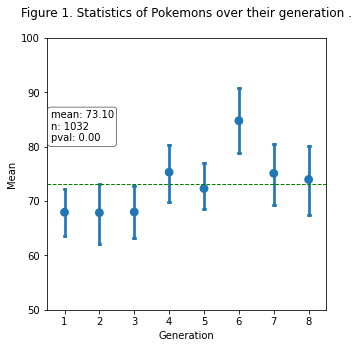

In [12]:
plt.figure(figsize=(5,5))
ax = sns.pointplot(x="Generation_cat_2", y="Mean", data=wbr, capsize=0.05, ci=99.9, join=0)
ax.set_ylabel('')
plt.yticks(np.arange(50, 110, step=10))
plt.ylim(50,100)
plt.axhline(y=wbr.Mean.mean(), linewidth=1, linestyle= 'dashed',color="green")
props = dict(boxstyle='round', facecolor='white', lw=0.5)
plt.text(-0.4, 81, "mean: 73.10" "\n" "n: 1032" "\n" "pval: 0.00", bbox=props)
plt.xlabel('Generation')
plt.ylabel('Mean')
plt.title('Figure 1. Statistics of Pokemons over their generation .''\n')
